In [1]:
! gdown -O lecture_5_log_data.csv https://drive.google.com/uc?id=1YVq71iUjSjqyqJtkmSRbC9NLMCrx0478

Downloading...
From: https://drive.google.com/uc?id=1YVq71iUjSjqyqJtkmSRbC9NLMCrx0478
To: /content/lecture_5_log_data.csv
280MB [00:02, 113MB/s]


# E1
Find the total number of missing values per wellbore in the machine learning dataset (log data)

In [3]:
import pandas as pd
import numpy as np
log=pd.read_csv('/content/lecture_5_log_data.csv',sep=';')
log.sample(5)

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
675204,31/6-5,542.823000,544108.62500,6720731.5,-519.808350,HORDALAND GP.,NaN,NaN,NaN,1.525491,1.525197,NaN,80.007675,NaN,NaN,NaN,174.197327,-22.748453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000,1.0
837460,34/11-2 S,4508.712000,467307.75000,6788061.0,-4363.407227,DUNLIN GP.,Burton Fm.,9.117157,NaN,7.276751,7.329414,2.663091,99.668213,NaN,0.177862,4.147980,80.318977,-29.205189,NaN,NaN,NaN,NaN,-0.011784,NaN,NaN,10.1556,-999.0,65000,1.0
1080417,35/4-1,2050.068000,516087.78125,6822414.0,-2023.945190,SHETLAND GP.,Kyrre Fm.,18.433146,NaN,1.041533,1.236440,2.345305,109.492310,NaN,0.410000,3.191677,123.462173,NaN,17.5,28.851395,273.182526,NaN,-0.006322,NaN,NaN,NaN,NaN,65000,1.0
853214,34/2-4,1269.441436,482076.31250,6847169.5,-1236.410156,NORDLAND GP.,NaN,19.099777,NaN,2.161196,2.369829,NaN,59.268063,NaN,NaN,NaN,116.359009,28.542757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000,1.0
928568,34/8-1,1555.833023,469662.28125,6803718.5,-1532.792603,HORDALAND GP.,Utsira Fm.,18.182089,NaN,0.763191,0.678527,2.070124,81.456657,NaN,NaN,2.384387,151.668350,41.440495,17.5,NaN,NaN,NaN,0.032599,NaN,NaN,NaN,NaN,65000,1.0


In [4]:
wellbore=log['WELL'].unique().tolist()
wellbore

['15/9-13',
 '15/9-15',
 '15/9-17',
 '16/1-2',
 '16/1-6 A',
 '16/10-1',
 '16/10-2',
 '16/10-3',
 '16/10-5',
 '16/11-1 ST3',
 '16/2-11 A',
 '16/2-16',
 '16/2-6',
 '16/4-1',
 '16/5-3',
 '16/7-4',
 '16/7-5',
 '16/8-1',
 '17/11-1',
 '25/11-15',
 '25/11-19 S',
 '25/11-5',
 '25/2-13 T4',
 '25/2-14',
 '25/2-7',
 '25/3-1',
 '25/4-5',
 '25/5-1',
 '25/5-4',
 '25/6-1',
 '25/6-2',
 '25/6-3',
 '25/7-2',
 '25/8-5 S',
 '25/8-7',
 '25/9-1',
 '26/4-1',
 '29/6-1',
 '30/3-3',
 '30/3-5 S',
 '30/6-5',
 '31/2-1',
 '31/2-19 S',
 '31/2-7',
 '31/2-8',
 '31/2-9',
 '31/3-1',
 '31/3-2',
 '31/3-3',
 '31/3-4',
 '31/4-10',
 '31/4-5',
 '31/5-4 S',
 '31/6-5',
 '31/6-8',
 '32/2-1',
 '33/5-2',
 '33/6-3 S',
 '33/9-1',
 '33/9-17',
 '34/10-19',
 '34/10-21',
 '34/10-33',
 '34/10-35',
 '34/11-1',
 '34/11-2 S',
 '34/12-1',
 '34/2-4',
 '34/3-1 A',
 '34/4-10 R',
 '34/5-1 A',
 '34/5-1 S',
 '34/7-13',
 '34/7-20',
 '34/7-21',
 '34/8-1',
 '34/8-3',
 '34/8-7 R',
 '35/11-1',
 '35/11-10',
 '35/11-11',
 '35/11-12',
 '35/11-13',
 '35/11

In [5]:
well_dict={}
for i in wellbore:
  well_data=log[log['WELL']==i]
  c=well_data.isna().sum().sum()
  well_dict[i]=c
print(well_dict)

{'15/9-13': 152438, '15/9-15': 78407, '15/9-17': 103283, '16/1-2': 12321, '16/1-6 A': 33080, '16/10-1': 123990, '16/10-2': 18246, '16/10-3': 112511, '16/10-5': 16087, '16/11-1 ST3': 205180, '16/2-11 A': 81760, '16/2-16': 88926, '16/2-6': 73302, '16/4-1': 81589, '16/5-3': 18227, '16/7-4': 68625, '16/7-5': 133154, '16/8-1': 55371, '17/11-1': 195316, '25/11-15': 15988, '25/11-19 S': 56112, '25/11-5': 35453, '25/2-13 T4': 165647, '25/2-14': 123259, '25/2-7': 204179, '25/3-1': 133740, '25/4-5': 211982, '25/5-1': 157645, '25/5-4': 99803, '25/6-1': 39096, '25/6-2': 17430, '25/6-3': 101081, '25/7-2': 132140, '25/8-5 S': 65504, '25/8-7': 70914, '25/9-1': 170658, '26/4-1': 125052, '29/6-1': 293132, '30/3-3': 200903, '30/3-5 S': 49161, '30/6-5': 202760, '31/2-1': 71952, '31/2-19 S': 73205, '31/2-7': 89744, '31/2-8': 180507, '31/2-9': 87177, '31/3-1': 156500, '31/3-2': 122231, '31/3-3': 120708, '31/3-4': 27992, '31/4-10': 82882, '31/4-5': 139131, '31/5-4 S': 198271, '31/6-5': 136160, '31/6-8': 105

In [6]:
well_df=pd.DataFrame(well_dict.items(),columns=['Wellbore','Missing Values'])
well_df

,Wellbore,Missing Values
0,15/9-13,152438
1,15/9-15,78407
2,15/9-17,103283
3,16/1-2,12321
4,16/1-6 A,33080
...,...,...
93,35/9-5,29730
94,35/9-6 S,129222
95,36/7-3,40607
96,7/1-1,151333


# E2
Find 5 wellbores with most null of null values in the dataset. Alos, plot historgram of wellbores with null values on y axis

In [7]:
sorted_well_missing_values=well_df.sort_values(by='Missing Values',ascending=False)
sorted_well_missing_values

,Wellbore,Missing Values
37,29/6-1,293132
67,34/2-4,274765
81,35/11-12,257761
84,35/11-6,236061
63,34/10-35,220901
...,...,...
82,35/11-13,15837
71,34/5-1 S,15128
97,7/1-2 S,14883
3,16/1-2,12321


In [8]:
#Top 5 wells with most missing values
sorted_well_missing_values.iloc[0:5,]

,Wellbore,Missing Values
37,29/6-1,293132
67,34/2-4,274765
81,35/11-12,257761
84,35/11-6,236061
63,34/10-35,220901


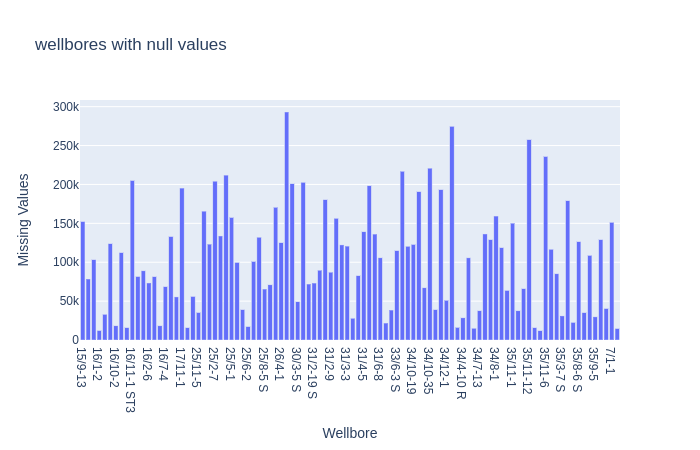

In [43]:
import plotly.express as pk
fig=pk.bar(well_df,x='Wellbore',y='Missing Values',title='wellbores with null values')
fig.write_html('wellbores with null values.html')
fig.show('png')

# E3
Compute Porosity using Density Log for the wellbore with least null values obtained from E2.

For simplicity, assume

desnity of matrix to be 2.8 g/cc
fluid to be fresh water and desnity of fresh water as 1.0 g/cc

In [10]:
well_id='35/11-15 S'
well=log[log['WELL']==well_id]
well

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
1018673,35/11-15 S,2818.0884,528168.7500,6775733.0,-2777.695068,VIKING GP.,Draupne Fm.,8.565486,NaN,NaN,7.834718,NaN,140.564056,0.008436,0.513411,NaN,82.410606,NaN,12.250001,28.720793,149.282501,NaN,NaN,NaN,NaN,24.290974,0.007488,65030,2.0
1018674,35/11-15 S,2818.2404,528168.6875,6775733.0,-2777.840332,VIKING GP.,Draupne Fm.,8.560300,NaN,NaN,7.731213,NaN,147.217041,0.008886,0.528357,NaN,83.025986,NaN,12.250001,25.673889,150.616882,NaN,NaN,NaN,NaN,23.419050,0.007357,65030,2.0
1018675,35/11-15 S,2818.3924,528168.6875,6775733.0,-2777.985596,VIKING GP.,Draupne Fm.,8.560110,NaN,NaN,7.627707,NaN,154.686554,0.008687,0.525525,NaN,83.406715,NaN,12.250001,27.015060,151.576187,NaN,NaN,NaN,NaN,22.548065,0.007480,65000,2.0
1018676,35/11-15 S,2818.5444,528168.6250,6775733.0,-2778.130859,VIKING GP.,Draupne Fm.,8.558233,NaN,NaN,7.524201,NaN,149.985840,0.008462,0.529476,NaN,84.011902,NaN,12.250001,29.662203,152.000000,NaN,NaN,NaN,NaN,21.675430,0.007541,65000,2.0
1018677,35/11-15 S,2818.6964,528168.6250,6775733.0,-2778.276367,VIKING GP.,Draupne Fm.,8.568883,NaN,NaN,7.420695,NaN,154.709732,0.007894,0.520900,NaN,84.118576,NaN,12.250001,31.105341,151.988510,NaN,NaN,NaN,NaN,20.803389,0.006481,65000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021264,35/11-15 S,3211.9204,528096.8125,6775839.0,-3149.980225,VIKING GP.,Heather Fm.,8.575231,NaN,23.392004,22.705898,2.597741,103.864220,NaN,NaN,4.685431,NaN,NaN,8.500000,10.629116,NaN,NaN,-0.066197,NaN,30.713432,17.992907,29.025089,65030,1.0
1021265,35/11-15 S,3212.0724,528096.7500,6775839.0,-3150.124512,VIKING GP.,Heather Fm.,8.572359,NaN,23.029095,22.536343,2.602453,102.638824,NaN,NaN,4.678300,NaN,NaN,8.500000,9.841094,NaN,NaN,-0.071148,NaN,27.311901,18.995470,25.975048,65030,1.0
1021266,35/11-15 S,3212.2244,528096.7500,6775839.0,-3150.268555,VIKING GP.,Heather Fm.,8.573650,NaN,22.948301,22.288410,2.607727,98.387581,NaN,NaN,4.702329,NaN,NaN,8.500000,11.265376,NaN,NaN,-0.074741,NaN,25.513748,20.205273,24.049646,65030,1.0
1021267,35/11-15 S,3212.3764,528096.7500,6775839.0,-3150.412598,VIKING GP.,Heather Fm.,8.569343,NaN,22.576391,21.976692,2.607720,101.272949,NaN,NaN,4.698790,NaN,NaN,8.500000,15.053039,NaN,NaN,-0.075161,NaN,24.449131,21.414949,23.115255,65030,1.0


In [14]:
def porosity(x):
  poro=(2.8-x['RHOB'])/(2.8-1.0)
  return poro
well['porosity']=well.apply(lambda x: porosity(x),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
well

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE,porosity
1018673,35/11-15 S,2818.0884,528168.7500,6775733.0,-2777.695068,VIKING GP.,Draupne Fm.,8.565486,NaN,NaN,7.834718,NaN,140.564056,0.008436,0.513411,NaN,82.410606,NaN,12.250001,28.720793,149.282501,NaN,NaN,NaN,NaN,24.290974,0.007488,65030,2.0,NaN
1018674,35/11-15 S,2818.2404,528168.6875,6775733.0,-2777.840332,VIKING GP.,Draupne Fm.,8.560300,NaN,NaN,7.731213,NaN,147.217041,0.008886,0.528357,NaN,83.025986,NaN,12.250001,25.673889,150.616882,NaN,NaN,NaN,NaN,23.419050,0.007357,65030,2.0,NaN
1018675,35/11-15 S,2818.3924,528168.6875,6775733.0,-2777.985596,VIKING GP.,Draupne Fm.,8.560110,NaN,NaN,7.627707,NaN,154.686554,0.008687,0.525525,NaN,83.406715,NaN,12.250001,27.015060,151.576187,NaN,NaN,NaN,NaN,22.548065,0.007480,65000,2.0,NaN
1018676,35/11-15 S,2818.5444,528168.6250,6775733.0,-2778.130859,VIKING GP.,Draupne Fm.,8.558233,NaN,NaN,7.524201,NaN,149.985840,0.008462,0.529476,NaN,84.011902,NaN,12.250001,29.662203,152.000000,NaN,NaN,NaN,NaN,21.675430,0.007541,65000,2.0,NaN
1018677,35/11-15 S,2818.6964,528168.6250,6775733.0,-2778.276367,VIKING GP.,Draupne Fm.,8.568883,NaN,NaN,7.420695,NaN,154.709732,0.007894,0.520900,NaN,84.118576,NaN,12.250001,31.105341,151.988510,NaN,NaN,NaN,NaN,20.803389,0.006481,65000,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021264,35/11-15 S,3211.9204,528096.8125,6775839.0,-3149.980225,VIKING GP.,Heather Fm.,8.575231,NaN,23.392004,22.705898,2.597741,103.864220,NaN,NaN,4.685431,NaN,NaN,8.500000,10.629116,NaN,NaN,-0.066197,NaN,30.713432,17.992907,29.025089,65030,1.0,0.112366
1021265,35/11-15 S,3212.0724,528096.7500,6775839.0,-3150.124512,VIKING GP.,Heather Fm.,8.572359,NaN,23.029095,22.536343,2.602453,102.638824,NaN,NaN,4.678300,NaN,NaN,8.500000,9.841094,NaN,NaN,-0.071148,NaN,27.311901,18.995470,25.975048,65030,1.0,0.109748
1021266,35/11-15 S,3212.2244,528096.7500,6775839.0,-3150.268555,VIKING GP.,Heather Fm.,8.573650,NaN,22.948301,22.288410,2.607727,98.387581,NaN,NaN,4.702329,NaN,NaN,8.500000,11.265376,NaN,NaN,-0.074741,NaN,25.513748,20.205273,24.049646,65030,1.0,0.106818
1021267,35/11-15 S,3212.3764,528096.7500,6775839.0,-3150.412598,VIKING GP.,Heather Fm.,8.569343,NaN,22.576391,21.976692,2.607720,101.272949,NaN,NaN,4.698790,NaN,NaN,8.500000,15.053039,NaN,NaN,-0.075161,NaN,24.449131,21.414949,23.115255,65030,1.0,0.106822


# E4
Create a Net Pay Log for the wellbore in E3 based on the volumne of shale with cutoff as .4. Further, find out the Net pay percentage in each formation

In [16]:
def vsh(x,gr_min, gr_max):
  vsh_ = (x['GR'] - gr_min) / (gr_max - gr_min)
  return vsh_

In [17]:
min_gr = well['GR'].min()
max_gr = well['GR'].max()
well['VSH']  = well.apply(lambda x : vsh(x, min_gr,  max_gr), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
well['Net_Pay'] = np.where(well['VSH'] <= .4 ,1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
grouped_formation=well.groupby(by='FORMATION')

In [46]:
grouped_formation['Net_Pay'].mean()

FORMATION
Draupne Fm.               0.135685
Heather Fm.               0.030181
Intra Heather Fm. Sst.    0.844347
Name: Net_Pay, dtype: float64